<a href="https://colab.research.google.com/github/Phanuwat-S-S/229351-StatisticalLearning/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [ ]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [ ]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-10-31 07:51:21--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-10-31 07:51:22 (16.8 MB/s) - ‘classes.txt’ saved [755/755]

--2025-10-31 07:51:22--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  

In [ ]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [ ]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [ ]:
# TODO: enter code here
np.random.seed(42)
X_original = np.random.rand(50, 4) * 10
# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = X_original - np.mean(X_original, axis=0)

print(f"ขนาดข้อมูลเริ่มต้น: {X_original.shape}")
print(f"ขนาดข้อมูลที่ Center แล้ว (data_c): {data_c.shape}")
# 2. หา covariance matrix
cov_matrix = np.cov(data_c, rowvar=False)

print(f"ขนาด Covariance matrix: {cov_matrix.shape}")
# 3. Decompose the covariance matrix UDU^T
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

print(f"Eigenvalues: {eigenvalues}")
print(f"ขนาด Eigenvectors matrix: {eigenvectors.shape}")
# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

top_two_eigenvectors = sorted_eigenvectors[:, :2]

print(f"Eigenvalues ที่เรียงจากมากไปน้อย: {sorted_eigenvalues}")
print(f"ขนาด Top 2 eigenvectors matrix: {top_two_eigenvectors.shape}")
# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
projected_data = data_c @ top_two_eigenvectors

# Result: a (50,2) matrix
print(f"\nขนาดของเมทริกซ์ข้อมูลสุดท้ายที่ลดมิติแล้ว: {projected_data.shape}")



ขนาดข้อมูลเริ่มต้น: (50, 4)
ขนาดข้อมูลที่ Center แล้ว (data_c): (50, 4)
ขนาด Covariance matrix: (4, 4)
Eigenvalues: [ 6.44013061  8.01537917  9.82542492 10.76264479]
ขนาด Eigenvectors matrix: (4, 4)
Eigenvalues ที่เรียงจากมากไปน้อย: [10.76264479  9.82542492  8.01537917  6.44013061]
ขนาด Top 2 eigenvectors matrix: (4, 2)

ขนาดของเมทริกซ์ข้อมูลสุดท้ายที่ลดมิติแล้ว: (50, 2)


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [ ]:
pca_sklearn = PCA(n_components=2)
data_pca_sklearn = pca_sklearn.fit_transform(data)

In [ ]:
#TODO (optional): enter code here
def check_equal_up_to_sign(matrix1, matrix2):
    # ตรวจสอบรูปร่าง
    if matrix1.shape != matrix2.shape:
        print(f"รูปร่างเมทริกซ์ไม่ตรงกัน: {matrix1.shape} vs {matrix2.shape}")
        return False

    # ตรวจสอบแต่ละคอลัมน์
    for i in range(matrix1.shape[1]):
        col1 = matrix1[:, i]
        col2 = matrix2[:, i]

        # ตรวจสอบว่าคอลัมน์เท่ากัน หรือตรงกันข้ามกัน
        are_equal = np.allclose(col1, col2)
        are_opposite = np.allclose(col1, -col2)

        if not (are_equal or are_opposite):
            print(f"คอลัมน์ที่ {i} ไม่ตรงกันทั้งค่าบวกและค่าลบ")
            return False

    return True

# ทำการตรวจสอบ
are_results_equal = check_equal_up_to_sign(projected_data, data_pca_sklearn)

print(f"รูปร่างเมทริกซ์จากวิธี Manual: {projected_data.shape}")
print(f"รูปร่างเมทริกซ์จากวิธี Sklearn: {data_pca_sklearn.shape}")
print(f"ผลลัพธ์จากทั้งสองวิธีเท่ากัน (ต่างกันแค่เครื่องหมาย +/-): {are_results_equal}")

if not are_results_equal:
    print("\nตัวอย่างข้อมูลจาก Manual (5 แถวแรก):")
    print(projected_data[:5])
    print("\nตัวอย่างข้อมูลจาก Sklearn (5 แถวแรก):")
    print(data_pca_sklearn[:5])

คอลัมน์ที่ 0 ไม่ตรงกันทั้งค่าบวกและค่าลบ
รูปร่างเมทริกซ์จากวิธี Manual: (50, 2)
รูปร่างเมทริกซ์จากวิธี Sklearn: (50, 2)
ผลลัพธ์จากทั้งสองวิธีเท่ากัน (ต่างกันแค่เครื่องหมาย +/-): False

ตัวอย่างข้อมูลจาก Manual (5 แถวแรก):
[[-1.51165246  4.39645859]
 [ 2.09678919  0.08580214]
 [ 5.82326769  3.81931578]
 [ 3.94434993 -5.13172434]
 [-0.93961293 -1.02864379]]

ตัวอย่างข้อมูลจาก Sklearn (5 แถวแรก):
[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]]


#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

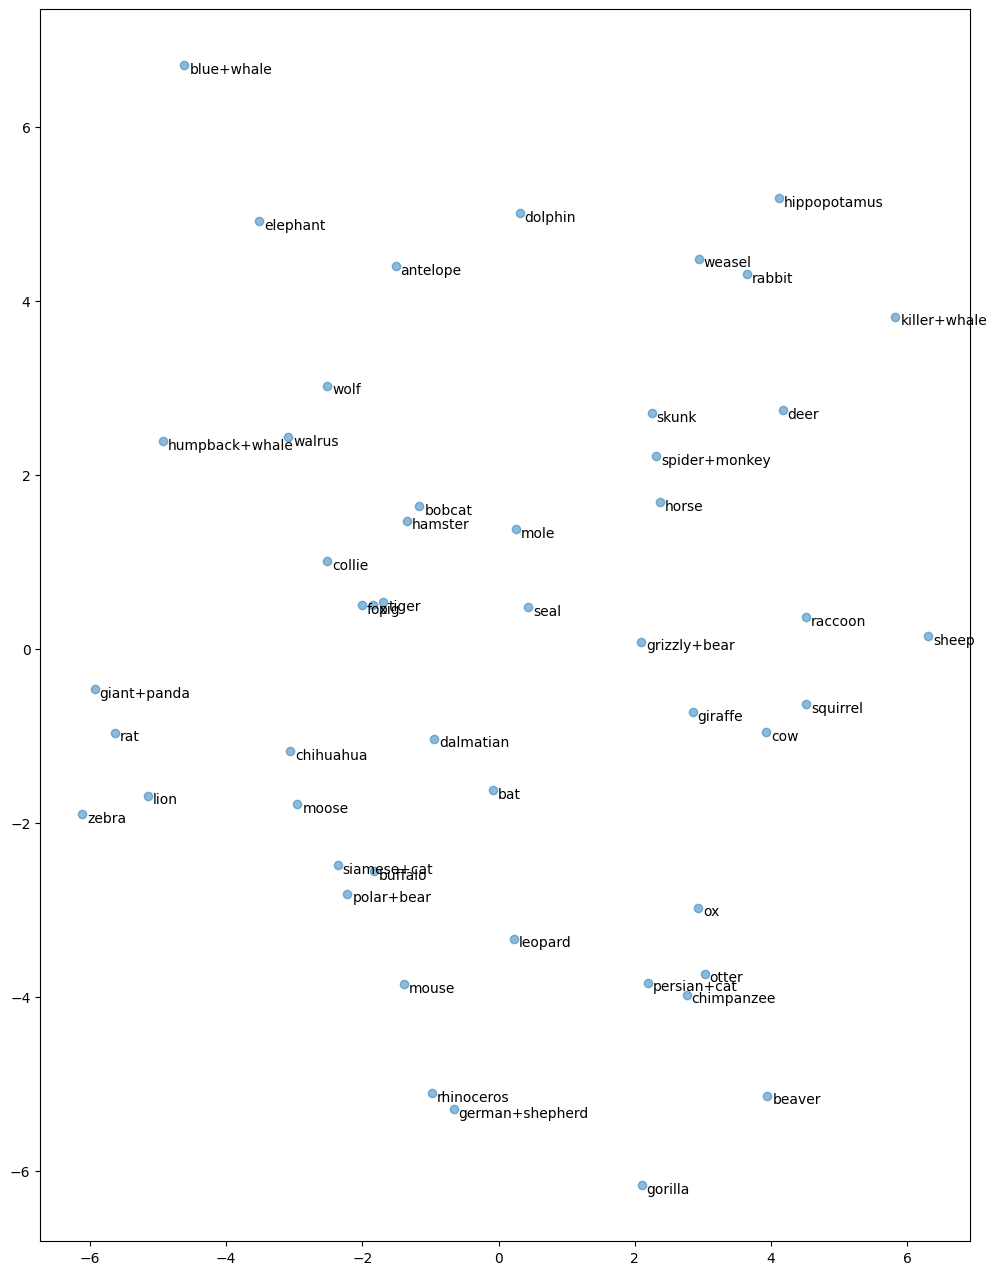

In [ ]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(projected_data[i, 0],
              projected_data[i, 1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมซ้ายบน ตัวอย่างเช่นblue+whale , elephantมีลักษณะที่เหมือนกันคือสัตว์เลี้ยงลูกด้วยนมในทะเลและสัตว์กินเนื้อขนาดใหญ่
2.กลุ่มสัตว์ที่แกน y 0 ถึง 4 ตัวอย่างเช่นdeer, skunk,tiger มีลักษณะที่เหมือนกันคือสัตว์ที่อยู่ในป่าอาศัยในป่าและขนาดใหญ่
3.กลุ่มสัตว์ที่แกน y 0 ถึง -4 ตัวอย่างเช่นrat, mouse,cow, sheepมีลักษณะที่เหมือนกันคือสัตว์ที่อยู่นป่าขนาดเล็กถึงกลางที่พบได้ทั่วไป
4.กลุ่มสัตว์ที่แกน y -4 ถึง -8 ตัวอย่างเช่นmouse,beaver,chimpaneeมีลักษณะที่เหมือนกันคือสัตว์กินพืช